## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
# examine the data to see if any changes need to be made before fully importing
test = pd.read_csv("C:\\Users\\natha\\Desktop\\Data 1 Class\\03_Lab_02\\lab-02\\data\\goodreads.csv")

# the goodreads data is missing headers.

# create a list of the new header titles.
new_headers = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']

# Load the goodreads data with a new additional header line.
goodreads_dirty = pd.read_csv("C:\\Users\\natha\\Desktop\\Data 1 Class\\03_Lab_02\\lab-02\\data\\goodreads.csv",
                         names=new_headers, encoding='utf-8')

# look at the first and last 5 rows
display(goodreads_dirty)

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5995,4.17,2226.0,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618.0,The River of Doubt
5996,3.99,775.0,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179.0,Shug
5997,3.78,540.0,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971.0,Flawed
5998,3.91,281.0,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083.0,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [26]:
# create a new dataframe with only the data we want to keep.

goodreads_subset = goodreads_dirty.loc[:, ['rating', 'isbn', 'author_url', 'year', 'genre_urls', 'name']].copy()
goodreads_subset.head()

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [27]:
# Count the missing values in each column
null_count = goodreads_subset.isnull().sum()
null_count

rating          2
isbn          477
author_url      2
year            7
genre_urls     62
name            2
dtype: int64

In [28]:
# ISBN - we have a lot of missing isbn numbers, these should be treated as empty strings since they are id numbers and should not be used in operations.
goodreads_subset.loc[goodreads_subset.isbn.isnull(), 'isbn']=""     # replace NaN with empty string

# GENRE URL - we have a lot of null genre_urls. We should remove these rows as they break our 'author' function in the next exercise.
goodreads_subset.loc[goodreads_subset.genre_urls.isnull(), 'genre_urls']=""     # replace NaN with empty string

# YEAR - we have 7 missing years. It should be ok to make these nulls an empty string, since we can still sort strings by chronological order.
goodreads_subset[goodreads_subset.year.notnull()]     # replace NaN with empty string

# RATING - delete books that don't have rating. It is not possible to assume/fill the missing ratings and it makes the dataset harder to use.
goodreads = goodreads_subset[goodreads_subset.rating.notnull()]
goodreads.isnull().sum()

rating        0
isbn          0
author_url    0
year          5
genre_urls    0
name          0
dtype: int64

In [29]:
goodreads.dtypes

rating        float64
isbn           object
author_url     object
year          float64
genre_urls     object
name           object
dtype: object

## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [30]:
test = goodreads.author_url[0]

test.split('.')[-1]

'Suzanne_Collins'

In [31]:
def get_author(url):
    name = url.split('.')[-1]
    return name

goodreads['Author'] = goodreads.author_url.map(get_author)

C:\Users\natha\AppData\Local\Temp\ipykernel_23296\3963922521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodreads['Author'] = goodreads.author_url.map(get_author)


In [32]:
goodreads_sorted = goodreads.sort_values(by=['rating', 'year'], ascending=(False,True))
goodreads_sorted.head()


,rating,isbn,author_url,year,genre_urls,name,Author
2909,5.0,0983002215,https://www.goodreads.com/author/show/6589034....,2011.0,,Family Secrets,Rebekah_McClew
2145,5.0,1300589469,https://www.goodreads.com/author/show/6906561....,2012.0,,A Book About Absolutely Nothing.,I_M_Nobody
2903,5.0,0983002282,https://www.goodreads.com/author/show/6589034....,2012.0,,Obscured Darkness (Family Secrets #2),Rebekah_McClew
4473,5.0,,https://www.goodreads.com/author/show/6896621....,2012.0,,Patience's Love,Ronda_Paige
5692,5.0,,https://www.goodreads.com/author/show/5989528....,2012.0,,Abstraction In Theory - Laws Of Physical Trans...,Subhajit_Ganguly


In [33]:
# create a new data frame so we can easily read the results.
goodreads_result = pd.DataFrame(columns=['year','books_written','highest_rated','highest_rating','lowest_rated','lowest_rating'])

for year, subset in goodreads_subset.groupby('year'):           # create a loop that creates a row for every year 
    bestbook = subset[subset.rating == subset.rating.max()]     # extract the best book in that year
    worstbook = subset[subset.rating == subset.rating.min()]    # extract the wort book in that year
    goodreads_result.loc[len(goodreads_result.index)] = [year, subset.shape[0], bestbook.name.values[0], bestbook.rating.values[0], worstbook.name.values[0], worstbook.rating.values[0]]  # places the data identified above into the data frame as defined in the first line.
goodreads_result

,year,books_written,highest_rated,highest_rating,lowest_rated,lowest_rating
0,-1500.0,1,The Epic of Gilgamesh,3.60,The Epic of Gilgamesh,3.60
1,-800.0,2,The Iliad/The Odyssey,4.01,The Odyssey,3.68
2,-560.0,1,Aesop's Fables,4.03,Aesop's Fables,4.03
3,-512.0,1,The Art of War,3.92,The Art of War,3.92
4,-500.0,1,The Bhagavad Gita,4.06,The Bhagavad Gita,4.06
...,...,...,...,...,...,...
288,2010.0,317,The Years Distilled,4.93,Beatrice and Virgil,3.08
289,2011.0,374,Family Secrets,5.00,"Revealing Eden (Save the Pearls, #1)",2.00
290,2012.0,355,A Book About Absolutely Nothing.,5.00,28 Ø­Ø±Ù,3.15
291,2013.0,276,Blade Heart,4.93,How To Be A Perfect Girl,2.90


## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [41]:
goodreads.to_csv("data/hw-03-cleaned.csv", index=False, header=True)

## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [42]:
# import the cleaned data set for the next couple of exercises
CleanGoodreads = pd.read_csv("C:\\Users\\natha\\Desktop\\Data 1 Class\\03_Lab_02\\lab-02\\data\\cleaned-goodreads.csv")
CleanGoodreads.head()

,rating,review_count,isbn,booktype,author_url,year,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [56]:
# Calculate the correlation coefficient. Give me a short definition of this coefficient
coefficient = CleanGoodreads.review_count.corr(CleanGoodreads['rating'], method='pearson')

print(f'The correlation coeffcient between the number of reviews and the rating = {coefficient:.4f}')

The correlation coeffcient between the number of reviews and the rating = -0.0379


In this exercise, we will calculate the Pearson correlation coefficient. This coefficient is a value for the linear correlation between two variables. The Pearson Coefficient is a value between -1 and 1, where -1 is perfect negative linear correlation and 1 is perfect linear correlation.

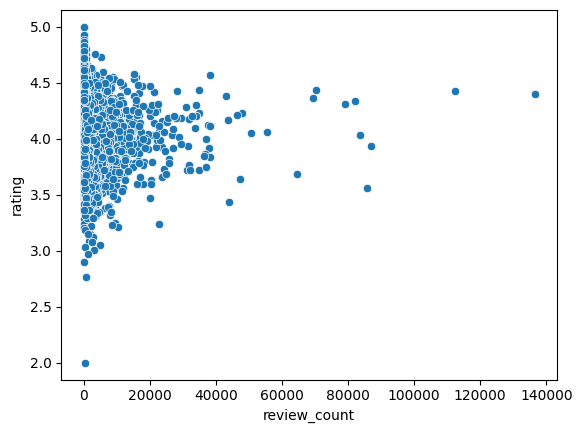

In [50]:
# create a scatter plot showing the relationship between the number of reviews and the average rating for books
plt.show(sns.scatterplot(data=CleanGoodreads, x='review_count', y='rating'))

# CONCLUSION: there is no correlation between the review count and the rating, which is also supported by the low correlation coefficient.

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

In [57]:
numeric_cols = CleanGoodreads.select_dtypes(include='number').columns #Select only numeric columns for statistics
df_stats = CleanGoodreads[list(numeric_cols)].agg(['mean','median','std','min','max']) #.agg() is useful for showing statstical properties in a DataFrame
df_stats = df_stats.round(2) #Round for better readability
df_stats.loc['range'] = df_stats.loc['max']-df_stats.loc['min']
df_stats = df_stats.drop(['min', 'max']) #Rows for minimum an maximum have been used and can be removed
df_stats

,rating,review_count,year,rating_count
mean,4.04,2374.33,1969.09,51183.90
median,4.05,936.00,2002.00,18072.00
std,0.26,5493.09,185.38,137649.34
range,3.00,136455.00,3514.00,2958969.00


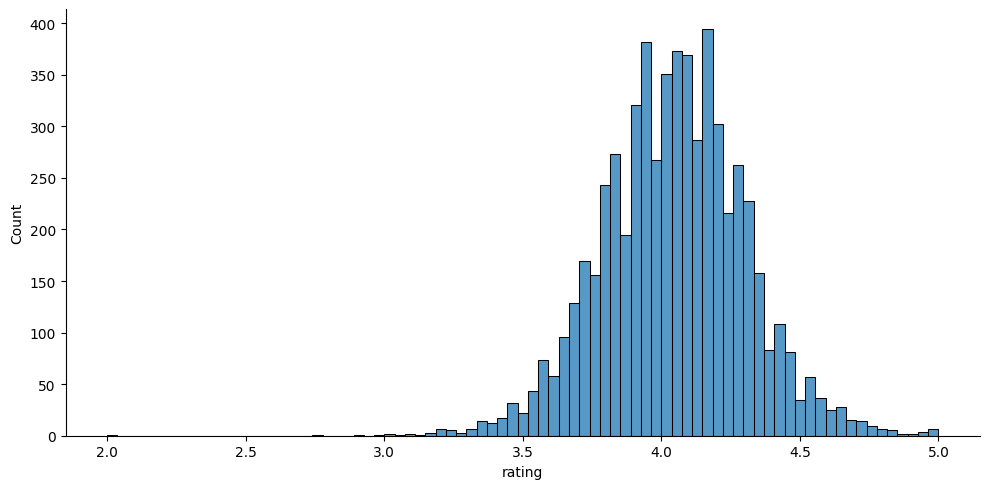

In [40]:
sns.displot(CleanGoodreads['rating'], aspect=2)